
# Logistic Regression Project


In this project we will be working with a fake set of advertising data, indicating that a specific internet user has clicked or not on an advertisement. Let's try to create a template that will allow you to click on it or not in a campaign using the user account.

This dataset contains the features:

* 'Daily time spent on site': time on site in minutes.
* 'Age': age of the consumer.
* 'Area Income': Average consumer income in the region.
* 'Daily Internet Usage': Average in minutes per consumer is on the internet.
* Ad topic line: Ad title.
* City: Consumer city.
* 'Male': Whether the consumer was male or not.
* 'Country': Consumer country.
* 'Timestamp': time when the consumer clicked on no advertisement or window.
* 'Ad-clicked': 0 or 1 indicates if it is not an ad.

## Importing Libraries

**Import some libraries that you think you are**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
ad_data = pd.read_csv('advertising.csv')

In [17]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [18]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [19]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [20]:
ad_data.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


Text(0.5, 0, 'Age')

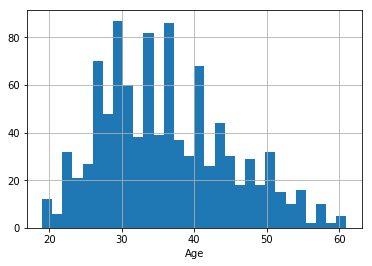

In [21]:
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

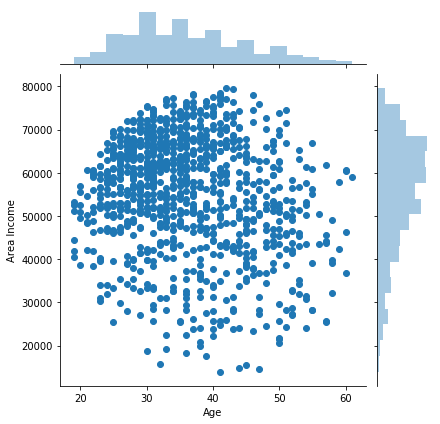

In [22]:
sns.jointplot(x='Age', y='Area Income', data=ad_data)

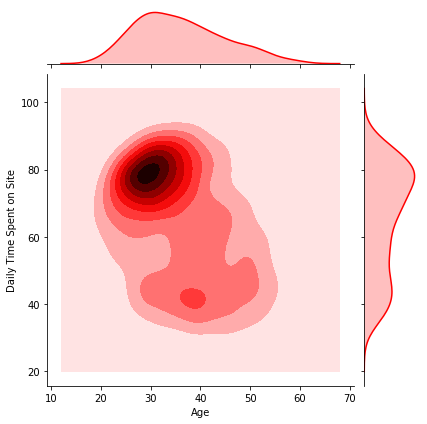

In [27]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde', color='r')

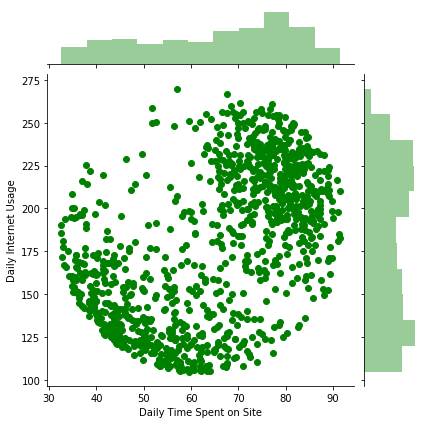

In [28]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, color='g')

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


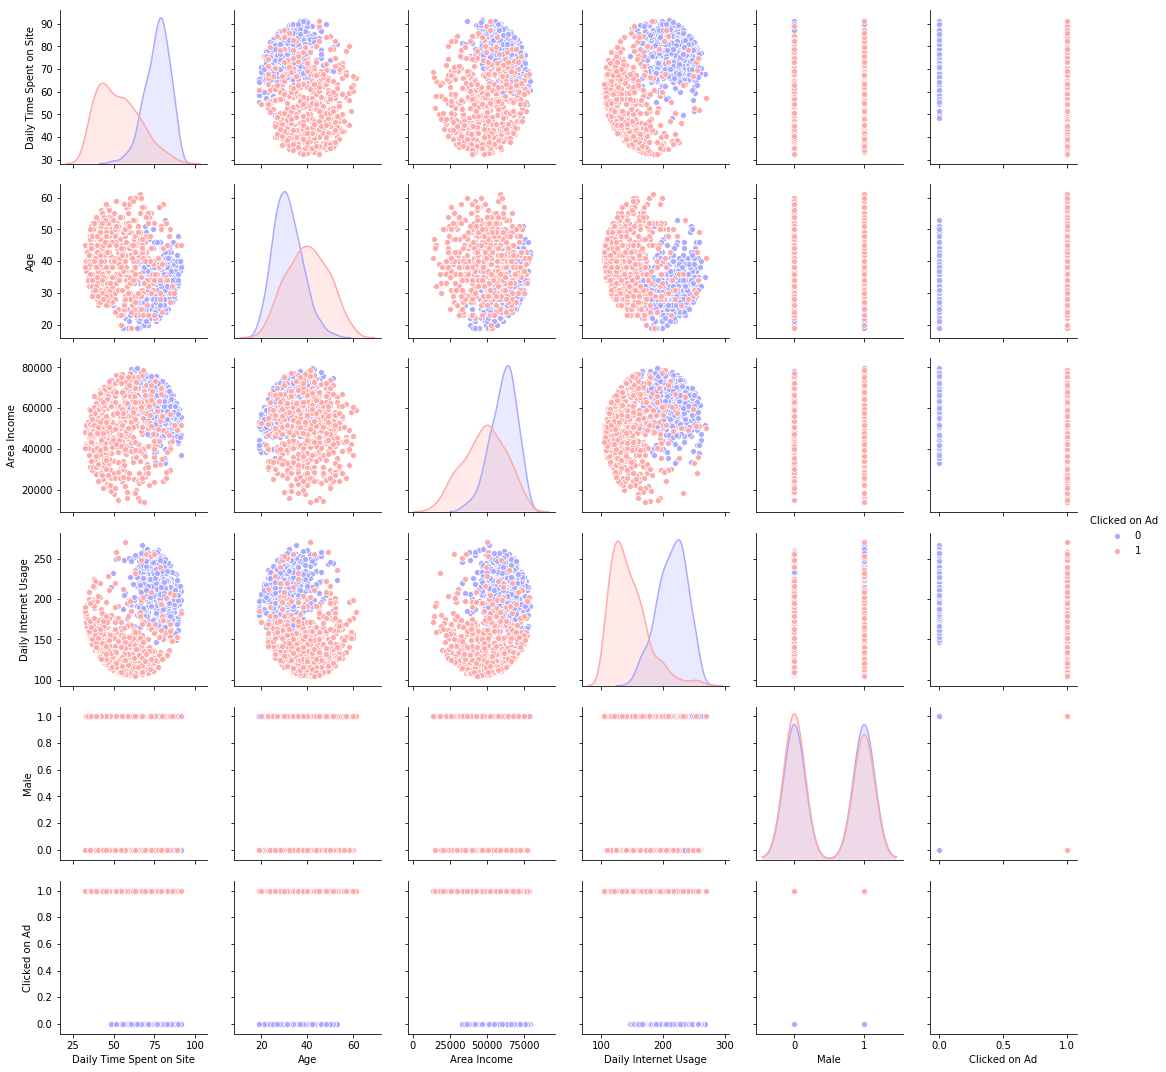

In [29]:
sns.pairplot(ad_data, hue='Clicked on Ad', palette='bwr')

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]

In [32]:
Y = ad_data['Clicked on Ad']

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
logmodel = LogisticRegression()

In [37]:
logmodel.fit(X_train, Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
predict = logmodel.predict(X_test)

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       162
           1       0.96      0.86      0.91       168

   micro avg       0.91      0.91      0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



**According to the proposed model, if we obtain the information at the moment of access to the site, 91% sure that the person will click on the advertisement.**